<a href="https://colab.research.google.com/github/sapna-90/Project---4/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_excel(r"/content/Processed_Flipdata - Project 4.xlsx")

In [3]:
Data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [5]:
# To check for any missing values
Data.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [6]:
# To drop unnecessary columns
Data = Data.drop(['Unnamed: 0'], axis=1)

In [7]:
Data.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [8]:
# Create the list of numerical data
numerical_data=[]
for i in Data.columns:
  if Data[i].dtype!='object':
    numerical_data.append(i)
numerical_data

['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize']

In [9]:
## now to create a list of categorical data
categorical_data=[]
for i in Data.columns:
  if Data[i].dtype=='object':
    categorical_data.append(i)
categorical_data

['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']

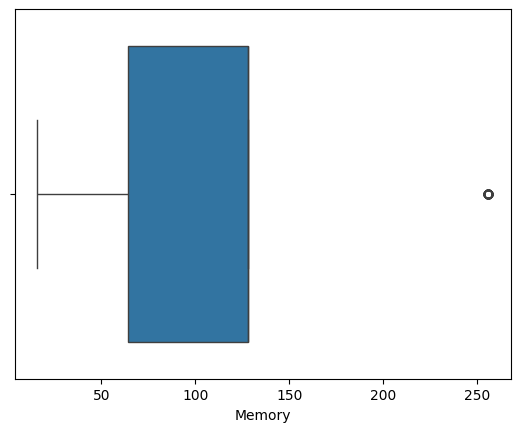

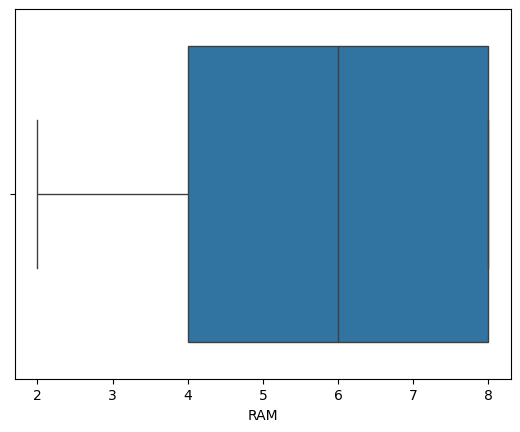

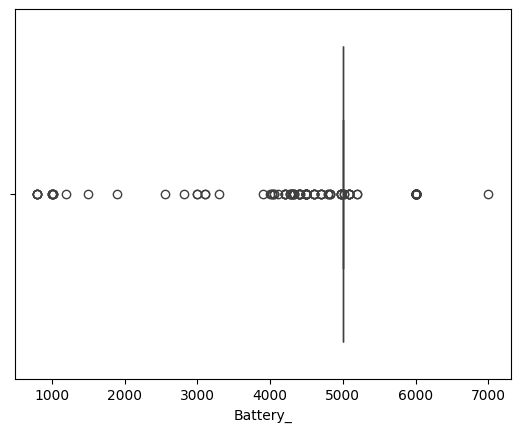

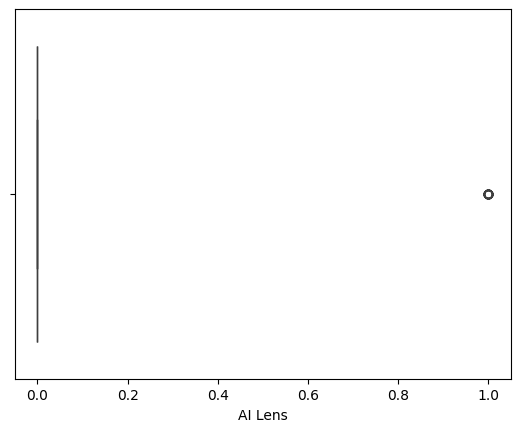

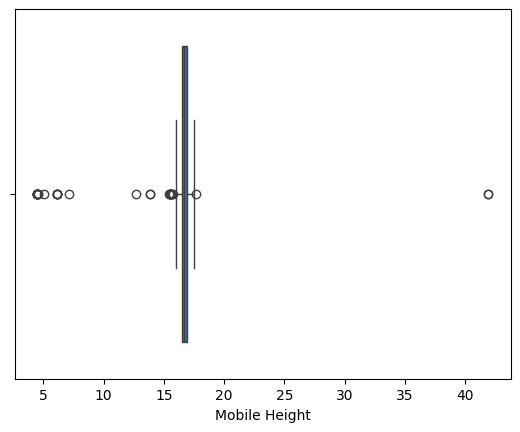

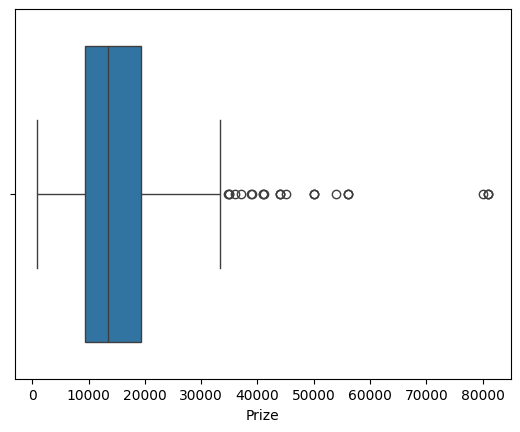

In [10]:
for i in numerical_data:
  sns.boxplot(x=i,data=Data)
  plt.show()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
Data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

In [13]:
Data = pd.get_dummies(Data, columns=['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_'], drop_first=True)

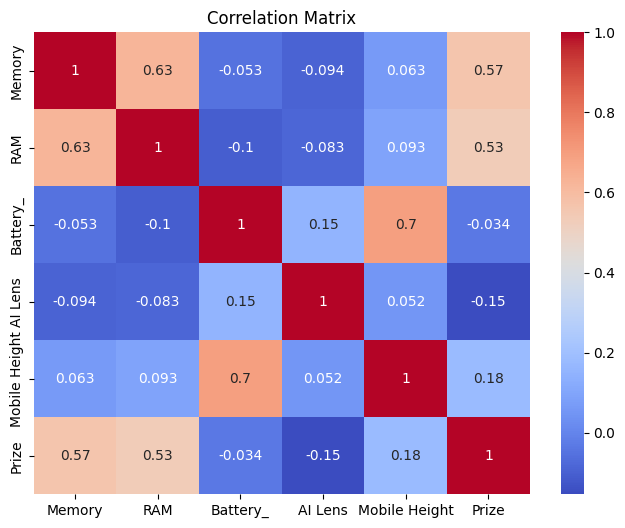

In [14]:
plt.figure(figsize=(8, 6))
data = Data.select_dtypes(include=[np.number])
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
Data['Prize'] = pd.to_numeric(Data['Prize'])
Q1 = Data['Prize'].quantile(0.25)
Q3 = Data['Prize'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((Data['Prize'] < (Q1 - 1.5 * IQR)) | (Data['Prize'] > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected using IQR method:\n", outliers)

Outliers detected using IQR method:
 25


In [16]:
# To calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
# To remove outliers
data_cleaned = Data[Data['Prize'].between(lower_bound, upper_bound)]

In [18]:
print("Data shape before removing outliers:", data.shape)
print("Data shape after removing outliers:", data_cleaned.shape)

Data shape before removing outliers: (541, 6)
Data shape after removing outliers: (516, 613)


In [19]:
data_cleaned.columns

Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize',
       'Model_APPLE iPhone 12', 'Model_APPLE iPhone 14 Plus',
       'Model_Google Pixel 6a', 'Model_Google Pixel 7',
       ...
       'Processor__Unisoc Spreadtrum SC9863A1', 'Processor__Unisoc T606',
       'Processor__Unisoc T610', 'Processor__Unisoc T612',
       'Processor__Unisoc T612 processor', 'Processor__Unisoc T616',
       'Processor__Unisoc Tiger T612 (12 nm)', 'Processor__Unisoc Tiger T616',
       'Processor__ios', 'Processor__snapdragon 888'],
      dtype='object', length=613)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [21]:
X = data_cleaned.drop('Prize', axis=1)
y = data_cleaned['Prize']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((412, 612), (104, 612), (412,), (104,))

In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=20)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=20)

In [23]:
# Predicting on the test set
predictions_rf = rf_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f" R2 Score {r2_score(predictions_rf, y_test)}")
print(f" mean_squared_error {mean_squared_error(predictions_rf, y_test)}")
print(f" Root mean_squared_error {np.sqrt(mean_squared_error(predictions_rf, y_test))}")
print(f" mean_absolute_error {mean_absolute_error(predictions_rf, y_test)}")

 R2 Score 0.900392815446962
 mean_squared_error 4637406.047141861
 Root mean_squared_error 2153.4637324881655
 mean_absolute_error 1464.166596153846


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# All the features except for Prize
X = data_cleaned.drop(['Prize'], axis =1)
# Defining the target
y = data_cleaned['Prize']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((412, 612), (104, 612), (412,), (104,))

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f" R2 Score {r2_score(predictions, y_test)}")
print(f" mean_squared_error {mean_squared_error(predictions, y_test)}")
print(f" Root mean_squared_error {np.sqrt(mean_squared_error(predictions, y_test))}")
print(f" mean_absolute_error {mean_absolute_error(predictions, y_test)}")

 R2 Score -0.04031984741486716
 mean_squared_error 2.803427509234068e+25
 Root mean_squared_error 5294740323409.702
 mean_absolute_error 2660144756036.5576


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# All the features except for Prize
X = data_cleaned.drop(['Prize'], axis =1)
# Defining the target
y = data_cleaned['Prize']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((412, 612), (104, 612), (412,), (104,))

In [30]:
dt_model = DecisionTreeRegressor(random_state=22)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f" R2 Score {r2_score(predictions, y_test)}")
print(f" mean_squared_error {mean_squared_error(predictions, y_test)}")
print(f" Root mean_squared_error {np.sqrt(mean_squared_error(predictions, y_test))}")
print(f" mean_absolute_error {mean_absolute_error(predictions, y_test)}")

 R2 Score -0.040319847939487286
 mean_squared_error 2.8034275106478007e+25
 Root mean_squared_error 5294740324744.737
 mean_absolute_error 2660144758291.377


In [32]:
data_cleaned.to_csv('Project_4.csv', index=False)